
## Unemployment Analysis

### Objectives:

* Assessing the Impact of Covid-19 Lockdown on Unemployment.
* Analyzing trend in labor participation rate across months
* Analyzing State-wise Variations in Unemployment Before & After Lockdown.
* Examine the Distribution of Employed People Across States.

In [1]:

# Importing required modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kaggle

In [6]:
# Downloading dataset via kaggle API
!kaggle datasets download -d gokulrajkmv/unemployment-in-india

  0%|                                               | 0.00/16.0k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 16.0k/16.0k [00:00<00:00, 2.36MB/s]


In [7]:
# Extracting the dataset file
!unzip 'unemployment-in-india.zip'

Archive:  unemployment-in-india.zip
  inflating: Unemployment in India.csv  
  inflating: Unemployment_Rate_upto_11_2020.csv  


In [9]:
# Loading the datasets
data1 = pd.read_csv("Unemployment in India.csv")
data2 = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

In [51]:
data1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [52]:
data2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [10]:
# Dropping the unessential columns
data1.drop(columns=[' Frequency','Area'], inplace=True)
data2.drop(columns=[' Frequency','Region.1', 'longitude','latitude'], inplace=True)

In [12]:
# Combining both dataframes
data_combined=pd.concat([data1, data2], axis=0)

In [13]:
data_combined.head()

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
0,Andhra Pradesh,31-05-2019,3.65,11999139.0,43.24
1,Andhra Pradesh,30-06-2019,3.05,11755881.0,42.05
2,Andhra Pradesh,31-07-2019,3.75,12086707.0,43.50
3,Andhra Pradesh,31-08-2019,3.32,12285693.0,43.97
4,Andhra Pradesh,30-09-2019,5.17,12256762.0,44.68


In [14]:
data_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1035 entries, 0 to 266
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    1007 non-null   object 
 1    Date                                     1007 non-null   object 
 2    Estimated Unemployment Rate (%)          1007 non-null   float64
 3    Estimated Employed                       1007 non-null   float64
 4    Estimated Labour Participation Rate (%)  1007 non-null   float64
dtypes: float64(3), object(2)
memory usage: 48.5+ KB


In [16]:
data_combined.columns=data_combined.columns.str.replace(' ','')

In [17]:
# Converting the 'Date' column to datetime format
data_combined['Date'] = pd.to_datetime(data_combined['Date'],dayfirst=True)

In [18]:
data_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1035 entries, 0 to 266
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Region                               1007 non-null   object        
 1   Date                                 1007 non-null   datetime64[ns]
 2   EstimatedUnemploymentRate(%)         1007 non-null   float64       
 3   EstimatedEmployed                    1007 non-null   float64       
 4   EstimatedLabourParticipationRate(%)  1007 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 48.5+ KB


In [21]:
# Checking for null values
data_combined.isnull().sum()

Region                                 28
Date                                   28
EstimatedUnemploymentRate(%)           28
EstimatedEmployed                      28
EstimatedLabourParticipationRate(%)    28
dtype: int64

In [22]:
# Checking for duplicate values
data_combined.duplicated().sum()

27

In [23]:
# Elminating duplicate and null data
data_combined.dropna(inplace=True)
data_combined.drop_duplicates(inplace=True)

In [25]:
data_combined.isnull().sum()

Region                                 0
Date                                   0
EstimatedUnemploymentRate(%)           0
EstimatedEmployed                      0
EstimatedLabourParticipationRate(%)    0
dtype: int64

In [26]:
data_combined.duplicated().sum()

0

In [29]:
# Distribution for numerical data
EmployedEstimateDF=data_combined[['EstimatedUnemploymentRate(%)','EstimatedEmployed','EstimatedLabourParticipationRate(%)']]
EmployedEstimateDF.describe()

,EstimatedUnemploymentRate(%),EstimatedEmployed,EstimatedLabourParticipationRate(%)
count,1007.000000,1.007000e+03,1007.000000
mean,11.906991,8.996209e+06,42.378620
std,10.739549,1.020784e+07,8.048542
min,0.000000,4.942000e+04,13.330000
25%,4.685000,1.639125e+06,37.835000
50%,8.890000,5.543380e+06,40.880000
75%,16.125000,1.287115e+07,45.315000
max,76.740000,5.943376e+07,72.570000


## Data Visualization

In [40]:
# Setting the Covid-19 lockdown start date
lockdown_start_date = pd.to_datetime('25-03-2020', dayfirst=True)
lockdown_start_date

Timestamp('2020-03-25 00:00:00')

In [42]:
# Splitting the data into two periods: before and after the lockdown
before_lockdown = data_combined[data_combined['Date'] < lockdown_start_date]
after_lockdown = data_combined[data_combined['Date'] >= lockdown_start_date]

# Calculating the average unemployment rate for each period
avg_unemployment_before = before_lockdown['EstimatedUnemploymentRate(%)'].mean()
avg_unemployment_after = after_lockdown['EstimatedUnemploymentRate(%)'].mean()

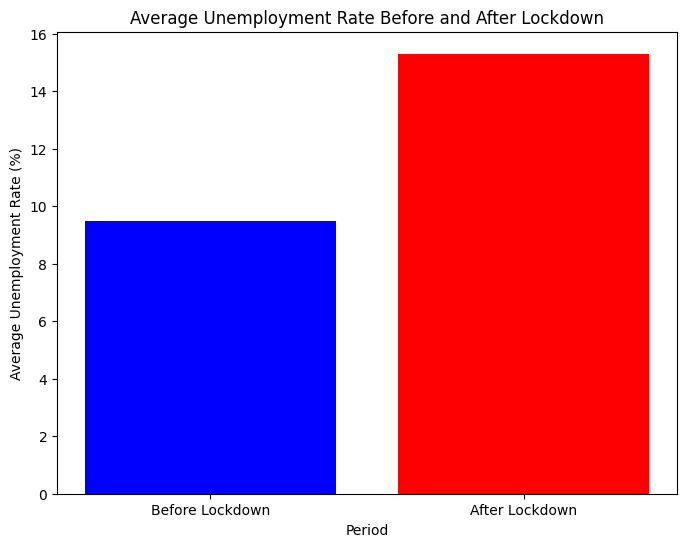

In [43]:
# Average Unemployment Rate Before and After Lockdown
avg_unemployment = [avg_unemployment_before, avg_unemployment_after]
periods = ['Before Lockdown', 'After Lockdown']

plt.figure(figsize=(8, 6))
plt.bar(periods, avg_unemployment, color=['blue', 'red'])
plt.title('Average Unemployment Rate Before and After Lockdown')
plt.xlabel('Period')
plt.ylabel('Average Unemployment Rate (%)')

plt.show()

The average unemployment rate increased significantly after the Covid-19 lockdown.

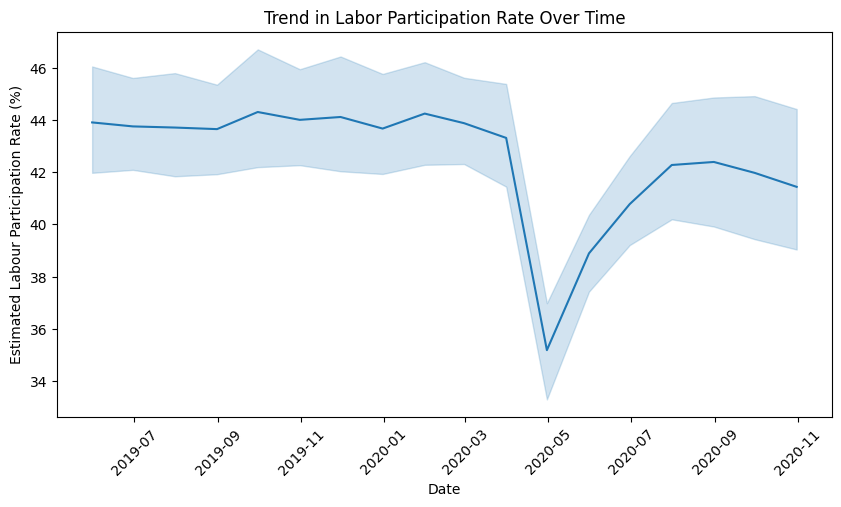

In [68]:
# Analyzing Trend in Labor Participation Rate Over Time
plt.figure(figsize=(10, 5))
sns.lineplot(data=data_combined, x='Date', y='EstimatedLabourParticipationRate(%)')
plt.title('Trend in Labor Participation Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Labour Participation Rate (%)')
plt.xticks(rotation=45);


The Labour participation gradually increases as the lockdown period comes to an end.

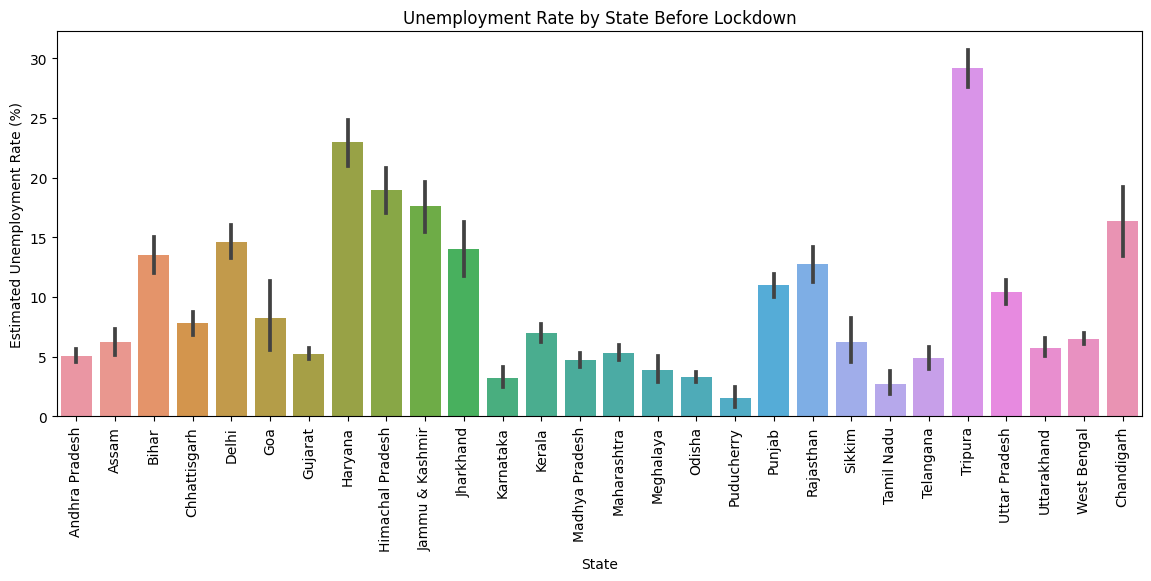

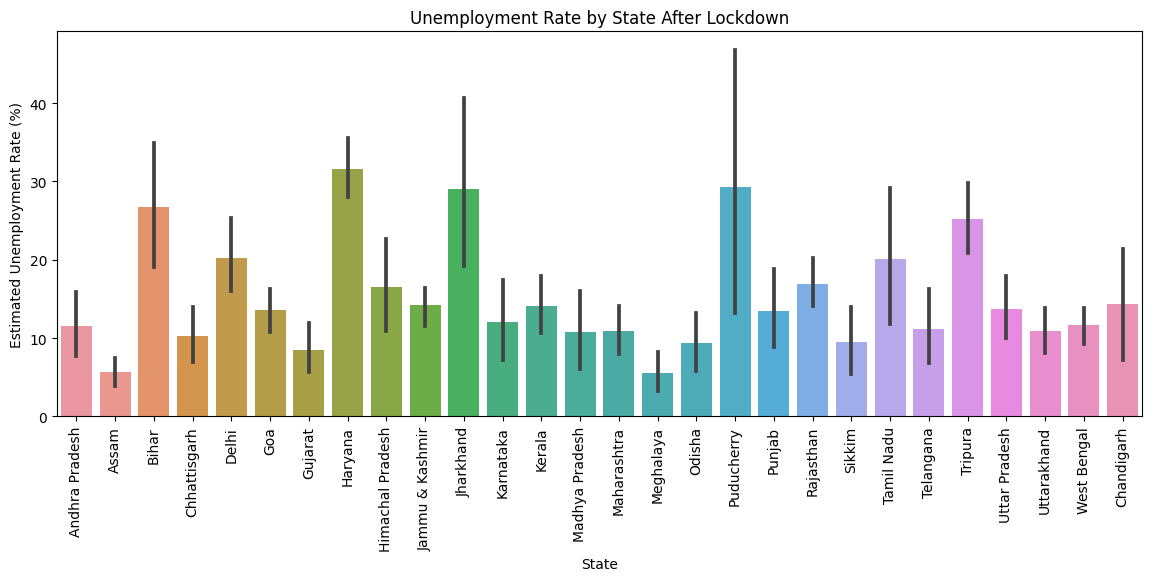

In [93]:

# State-wise Variations in Unemployment Before & After Lockdown.
plt.figure(figsize=(14, 5))
sns.barplot(data=before_lockdown, x='Region', y='EstimatedUnemploymentRate(%)')
plt.title('Unemployment Rate by State Before Lockdown')
plt.xlabel('State')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(14, 5))
sns.barplot(data=after_lockdown, x='Region', y='EstimatedUnemploymentRate(%)')
plt.title('Unemployment Rate by State After Lockdown')
plt.xlabel('State')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.show()

The bar plot displays the unemployment rate by state before and after the lockdown, highlighting state variations.

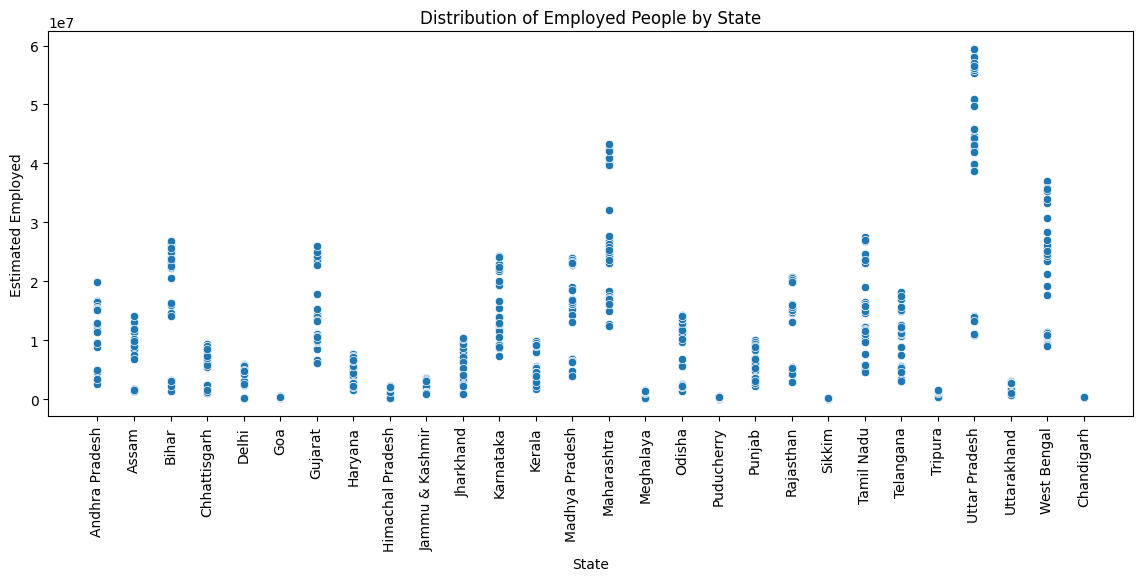

In [97]:
# Distribution of employed people across states
plt.figure(figsize=(14, 5))
sns.scatterplot(data=data_combined, x='Region', y='EstimatedEmployed')
plt.title('Distribution of Employed People by State')
plt.xlabel('State')
plt.ylabel('Estimated Employed')
plt.xticks(rotation=90);

The scatter plot illustrates the distribution of employed people across states, showing variations in employment levels.